<a href="https://colab.research.google.com/github/jasimrashid/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



**1. Write a Function**

In [9]:
false_positive_rate = .08
true_positive_rate = 1

# After one positive breathanalyzer test
prob_drunk_prior=.001
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  numerator = true_positive_rate*prob_drunk_prior
  denominator = true_positive_rate*prob_drunk_prior + false_positive_rate*(1-prob_drunk_prior)
  return (numerator/denominator)

prob_drunk_prior = prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate)
print("Probability person is drunk after one positive breathanalyzer test = ", prob_drunk_prior)

# After two positive breathanalyzer tests

prob_drunk_prior = prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate)
print("Probability person is drunk after two positive breathanalyzer test = ", prob_drunk_prior)


Probability person is drunk after one positive breathanalyzer test =  0.012357884330202669
Probability person is drunk after two positive breathanalyzer test =  0.13525210993291495


In [16]:
# How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

false_positive_rate = .08
true_positive_rate = 1
prob_drunk_prior=.001

number_of_tests = 0

while prob_drunk_prior < .95:
  prob_drunk_prior = prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate)
  print("Probability person is drunk after test #", number_of_tests+1,": ", prob_drunk_prior)
  number_of_tests += 1

print("\nTotal # of tests to get to 95%: ", number_of_tests)




Probability person is drunk after test # 1 :  0.012357884330202669
Probability person is drunk after test # 2 :  0.13525210993291495
Probability person is drunk after test # 3 :  0.6615996951348605
Probability person is drunk after test # 4 :  0.9606895076105054

Total # of tests to get to 95%:  4


**2. Explore scipy.stats.bayes_mvs**

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import t, ttest_1samp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-04-15 19:56:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-04-15 19:56:09 (135 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [19]:
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df=pd.read_csv('house-votes-84.data', names=column_headers)

print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [20]:
df=df.replace({'y':1,'n':0,'?':np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [34]:
dem = df[df['party']=='democrat']
rep = df[df['party']=='republican']

column_name = 'education'
mean_CI, _, _ = stats.bayes_mvs(dem[column_name].dropna())

print("bayes mvs with alpha = .9: ", mean_CI[1])

mean_CI, _, _ = stats.bayes_mvs(dem[column_name].dropna(), .95)
print("bayes mvs with alpha = .95: ", mean_CI[1])

mean_CI, _, _ = stats.bayes_mvs(dem[column_name].dropna(), .99)
print("bayes mvs with alpha = .99: ", mean_CI[1])

bayes mvs with alpha = .9:  (0.10770870991038944, 0.1814479165956346)
bayes mvs with alpha = .95:  (0.10059494022327561, 0.18856168628274847)
bayes mvs with alpha = .99:  (0.08661050929949306, 0.20254611720653104)


In [35]:
stats.mvsdist(dem[column_name].dropna())

(<scipy.stats._distn_infrastructure.rv_frozen at 0x7fa37d238710>,
 <scipy.stats._distn_infrastructure.rv_frozen at 0x7fa37d229be0>)

In [37]:
stats.kstat(dem[column_name])

nan

((array([-2.79528612, -2.49527961, -2.32510771, -2.20368347, -2.10804586,
         -2.02851775, -1.96006799, -1.89973233, -1.84561129, -1.79641163,
         -1.75121149, -1.70932968, -1.67024799, -1.63356263, -1.59895262,
         -1.56615839, -1.53496693, -1.50520118, -1.4767123 , -1.44937394,
         -1.42307783, -1.39773052, -1.37325073, -1.34956728, -1.32661752,
         -1.30434597, -1.28270326, -1.26164524, -1.2411323 , -1.22112871,
         -1.20160217, -1.18252334, -1.1638655 , -1.14560426, -1.12771727,
         -1.11018398, -1.0929855 , -1.07610438, -1.05952448, -1.04323083,
         -1.02720954, -1.01144766, -0.99593315, -0.98065472, -0.96560185,
         -0.95076465, -0.93613386, -0.92170076, -0.90745716, -0.89339533,
         -0.87950797, -0.86578819, -0.85222948, -0.83882567, -0.82557088,
         -0.81245959, -0.79948649, -0.78664657, -0.77393505, -0.76134738,
         -0.7488792 , -0.73652636, -0.72428491, -0.71215104, -0.70012113,
         -0.68819169, -0.6763594 , -0.

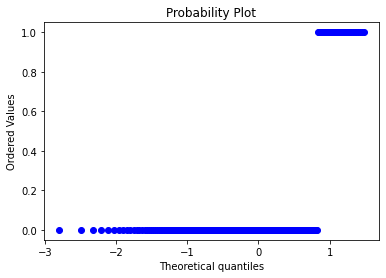

In [40]:
stats.probplot(dem[column_name], plot=plt)

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # pass extra parameter (ddof=1) to calculate **sample** standard deviation
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  # Lookup the t-statistic that corresponds to 95% area under the curve
  # for my given degrees of freedom: 49
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean - margin_of_error, mean, mean + margin_of_error)
  

In [28]:
confidence_interval(dem[column_name].dropna())

(0.10059494022327561, 0.14457831325301204, 0.18856168628274847)

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")



In [0]:
ax = sns.barplot(x="party", y="handicapped-infants", data=df )
# plt.errorbar(x=df['party'],y=df['handicapped-infants'],yerr=ci_length)
# plt.bar(["dem"], mean_CI[0], yerr=mean_CI[0]-mean_CI[1][0])

In [0]:
ax = sns.barplot(x="party", y="budget", data=df)

<BarContainer object of 1 artists>

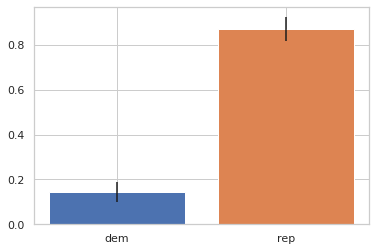

In [88]:
mean_CI_dem_bayes, _, _ = stats.bayes_mvs(dem[column_name].dropna(),.95)
plt.bar(["dem"], mean_CI_dem[0], yerr=mean_CI_dem[0]-mean_CI_dem[1][0])
mean_CI_rep_bayes, _, _ = stats.bayes_mvs(rep[column_name].dropna(),.95)
plt.bar(["rep"], mean_CI_rep[0], yerr=mean_CI_rep[0]-mean_CI_rep[1][0])


# plt.bar(["rep"], mean_rep, yerr=moe_rep)
# plt.show()

<BarContainer object of 1 artists>

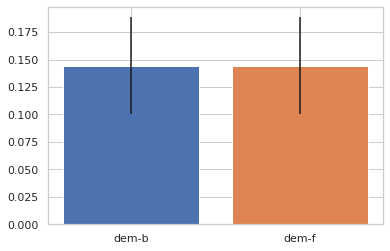

In [99]:
lower, mean, upper = confidence_interval(dem[column_name].dropna())
plt.bar(["dem-b"], mean, yerr=mean-lower)

# lower, mean, upper = confidence_interval(rep[column_name].dropna())
# plt.bar(["rep"], mean, yerr=mean-lower)

mean_CI_dem_bayes, _, _ = stats.bayes_mvs(dem[column_name].dropna(),.95)
plt.bar(["dem-f"], mean_CI_dem[0], yerr=mean_CI_dem[0]-mean_CI_dem[1][0])

# mean_CI_rep_bayes, _, _ = stats.bayes_mvs(rep[column_name].dropna(),.95)
# plt.bar(["rep"], mean_CI_rep[0], yerr=mean_CI_rep[0]-mean_CI_rep[1][0])

# print(mean-lower)

<BarContainer object of 1 artists>

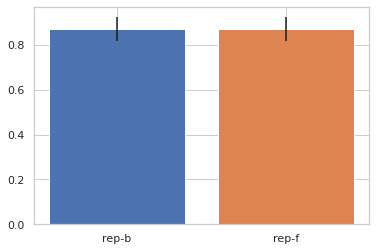

In [101]:
lower, mean, upper = confidence_interval(rep[column_name].dropna())
plt.bar(["rep-b"], mean, yerr=mean-lower)

# mean_CI_dem_bayes, _, _ = stats.bayes_mvs(dem[column_name].dropna(),.95)
# plt.bar(["dem-f"], mean_CI_dem[0], yerr=mean_CI_dem[0]-mean_CI_dem[1][0])

mean_CI_rep_bayes, _, _ = stats.bayes_mvs(rep[column_name].dropna(),.95)
plt.bar(["rep-f"], mean_CI_rep[0], yerr=mean_CI_rep[0]-mean_CI_rep[1][0])

**Difference between Bayesian and Frequentist statistics**


Frequentist statistics provides estimates by emphasizing the frequency or proportion of the data. 

Bayesian Statistics uses probabilities based on past events in addition to inputs used in frequentist statistics, in order to provide estimates.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!